In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_combine = pd.read_csv("Citi_Bike_LG_merge")
df_temp = pd.read_csv("Citi_Weather_Date")

In [2]:
sns.set_style("ticks", {"axes.facecolor": "#bde0fe"})
sns.set_palette(["#ffafcc","#ffc8dd","#cdb4db"])

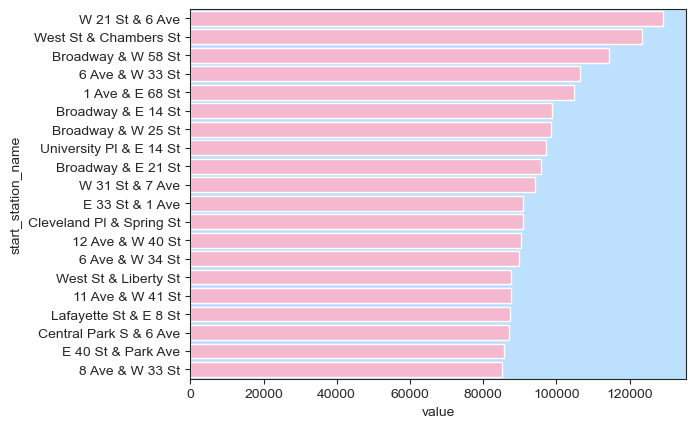

In [26]:
# bar plot of the top 20 starting stations frequencies
df_combine["value"] = 1
df_t = df_combine.groupby("start_station_name")["value"].count().reset_index()
top20 = df_t.nlargest(20, "value")
sns.barplot(data = top20, x = "value", y = "start_station_name")
plt.show()

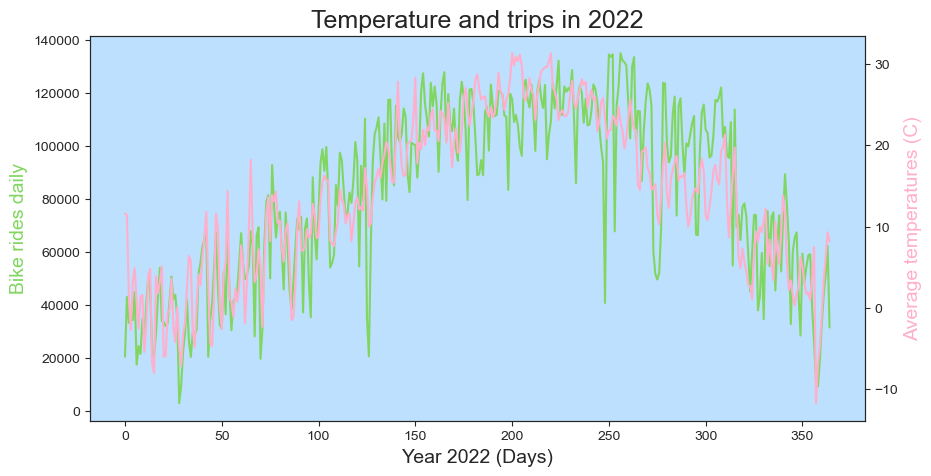

In [6]:
# recreated the dual-axis line plot from the 2.3 using seaborn.
fig,ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_temp["bike_rides_daily"], color = "#81d660")
ax.set_xlabel("Year 2022 (Days)", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily", color = "#81d660", fontsize = 14) # set y-axis label
ax2 = ax.twinx()
sns.lineplot(data = df_temp["avgTemp"], color="#ffafcc", ax=ax2)
ax2.set_ylabel("Average temperatures (C)", color = "#ffafcc",fontsize=14)
plt.title("Temperature and trips in 2022", fontsize = 18)
plt.show()

# changed the color of the Bike Rides line for visibility

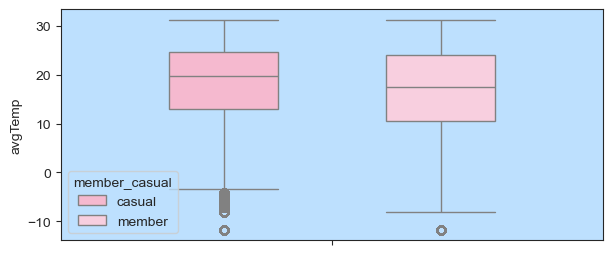

In [4]:
plt.figure(figsize=(7,3))
sns.boxplot( y = "avgTemp", hue = "member_casual", widths=.2, data = df_combine)
plt.show()

What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot.

Temperature range is a bit smaller for a casual bike riders. This is expected because they will be less committed to riding their bike in colder weather than someone who is willing to pay for a membership. However, the upper and lower quartile lines that define the box are comparable. The median is also not as different as expected.

In [4]:
# extracting trip duration for FacetGrid
import datetime

# store number of bike visits and create smaller df with columns for ploting
df_duration = df_combine[["started_at", "ended_at", "date", "avgTemp"]].copy()

df_duration["started_at"] = df_duration["started_at"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))
df_duration["ended_at"] = df_duration["ended_at"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f"))

def findDuration(start_time, end_time):
    return ( (end_time - start_time).total_seconds() ) / 60 

# use function to store trip duration in minutes in column
df_duration["trip_duration"] = df_duration.apply(lambda x: findDuration(x.started_at, x.ended_at), axis=1)

In [7]:
df_duration["bike_visits"] = 1
df_duration = df_duration.groupby(["date"]).agg(
    {"trip_duration" : "mean",
     "bike_visits" : "count",
    "avgTemp" : "mean"
    }).reset_index()

In [20]:
# group temp like done for the graph above
def groupTemps(row):
    if 0 > row["avgTemp"]: 
        return "<0"
    if 20 >= row["avgTemp"] >= 0:
        return "0-20"
    if row["avgTemp"] > 20:
        return ">20"

df_duration["temp"] = df_duration.apply(groupTemps, axis = 1)

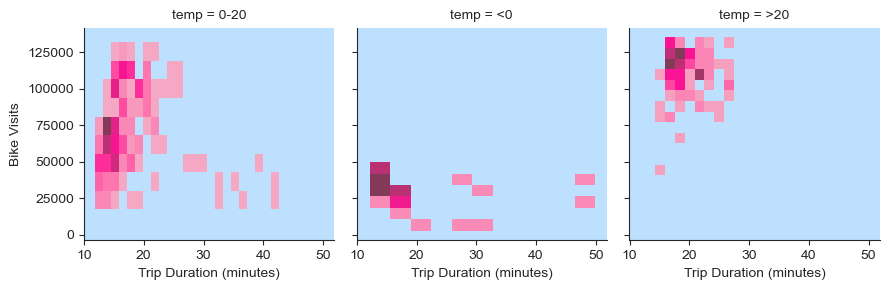

In [24]:
df_duration = df_duration.sort_index()

grid = sns.FacetGrid(df_duration, col = "temp")
grid.map(sns.histplot, "trip_duration", "bike_visits") 
#grid.set_xticklabels(rotation=90)
grid.set_axis_labels("Trip Duration (minutes)", "Bike Visits");

Write 2 to 3 sentences analyzing what insight its output brings.

By grouping temperatures to create multiple graphs comparing the relationship between bike visits to stations and trip duration. In 0-20 C weather, there is a steep positive correlation between trip duration and bike visits. This means that when bikes are being used more, the ride is longer in this weather. In below zero degrees, there is a weak negative correlation, so less popular and longer rides. And in greater than 20 degree weather, trip duration is usually within 15-30 minutes and over 75k visits. 